# Using Current Data To Make Recommendations
### Model #1: (Classification - Fully Paid vs. Default) 
### Model #2: ( Regression - Annualized Return %)

In [17]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from functions_and_objects import (impute_means_zeros_maxs_X,parse_percentage,
                                   clean_new_LC_data_classification_current,clean_LC_data_classification_eval,
                                   preprocessing_current, preprocessing_future_test, columns_list, 
                                   nan_max_cols, nan_mean_cols, nan_zero_cols, dtype,
                                   one_hot_encode_current, concat_X_and_6ohe_dfs,
                                   prep_all_df_for_classification, 
                                   view_columns_by_number_of_rows_that_have_nan,
                                   current_pipeline)
from functions_and_objects import (prep_df_for_regression_current,
                                   calc_annu_return,impute_annu_return_to_y,
                                   scale_current)

import joblib
from sklearn.metrics import (accuracy_score, precision_score, recall_score, #classification
                             f1_score, roc_auc_score, roc_curve,precision_recall_fscore_support, #classification
                             r2_score,mean_squared_error) #regression
from sklearn.preprocessing import StandardScaler

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Import New Data from 2018-2019

- These files contain complete loan data for all loans issued through the time period stated, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter.

In [2]:
raw_q12019 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2019Q1.csv',header=1)
raw_q42018 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2018Q4.csv',header=1)
raw_q32018 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2018Q3.csv',header=1)
raw_q22018 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2018Q2.csv',header=1)
raw_q12018 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2018Q1.csv',header=1)
dfs_list = [raw_q42018,
            raw_q32018,
            raw_q22018,
            raw_q12018]

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,144,145,146) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,129,130,131,134,135,136,139,144,145,146) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(raw_q42018.shape)
print(raw_q32018.shape)
print(raw_q22018.shape)
print(raw_q12018.shape)


(128414, 150)
(128196, 150)
(130774, 150)
(107866, 150)


### Load DF from Pipeline

In [4]:
final_df = current_pipeline(dfs_list, 'nn_v7.joblib', 'ridge_lin_reg_v2.joblib')

/home/jupyter/peervest/functions_and_objects.py:275: FutureWarning: Passing datetime64-dtype data to TimedeltaIndex is deprecated, will raise a TypeError in a future version
  raw_lc_df['earliest_cr_line'] = pd.to_timedelta(pd.to_datetime(raw_lc_df['earliest_cr_line'])).dt.days
Using TensorFlow backend.
W0708 03:59:23.333985 140253694981888 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0708 03:59:23.355605 140253694981888 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0708 03:59:23.454501 140253694981888 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_

In [5]:
len(final_df)

361423

### Try it Manually

In [3]:
clean_lc_df_current = clean_new_LC_data_classification_current(dfs_list)
X_current, y_current = preprocessing_current(clean_lc_df_current)
(ohe_home_ownership, ohe_purpose, ohe_zip_code, 
 ohe_application_type, ohe_sub_grade, ohe_emp_title_2) = one_hot_encode_current(X_current)
X_current_classif = concat_X_and_6ohe_dfs(X_current, ohe_home_ownership, ohe_purpose, ohe_zip_code,
                                      ohe_application_type, ohe_sub_grade, ohe_emp_title_2)
X_current_regr = concat_X_and_6ohe_dfs(X_current, ohe_home_ownership, ohe_purpose, ohe_zip_code, 
                                   ohe_application_type, ohe_sub_grade, ohe_emp_title_2)
prep_all_df_for_classification(X_current_classif) #drops columns in place
class_model = joblib.load('nn_v7.joblib')

/home/jupyter/peervest/functions_and_objects.py:275: FutureWarning: Passing datetime64-dtype data to TimedeltaIndex is deprecated, will raise a TypeError in a future version
  raw_lc_df['earliest_cr_line'] = pd.to_timedelta(pd.to_datetime(raw_lc_df['earliest_cr_line'])).dt.days
Using TensorFlow backend.
W0708 04:07:58.662530 140604772128512 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0708 04:07:58.684106 140604772128512 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0708 04:07:58.793218 140604772128512 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_

In [4]:
X_current_classif = X_current_classif.astype('float32')

In [5]:
current_class_preds_proba = class_model.predict_proba(X_current_classif,verbose=1)

361423/361423 [==============================] - 35s 95us/step


In [6]:
current_class_preds_proba

array([[0.45086733],
       [0.10927767],
       [0.00786951],
       ...,
       [0.9927897 ],
       [0.9868189 ],
       [0.24322358]], dtype=float32)

In [7]:
class_model.predict(X_current_classif)

array([[0.45086733],
       [0.10927767],
       [0.00786951],
       ...,
       [0.9927897 ],
       [0.9868189 ],
       [0.24322358]], dtype=float32)

In [15]:
class_model.predict_classes(X_current_classif)

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]], dtype=int32)

(array([150., 176., 166., 142., 122., 143., 138., 143., 125., 148., 136.,
        135., 155., 140., 118., 140., 130., 134., 141., 126., 128., 147.,
        127., 137., 132., 153., 128., 126., 128., 120., 135., 140., 133.,
        130., 150., 131., 132., 129., 135., 140.]),
 array([0.4  , 0.405, 0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 ,
        0.445, 0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485,
        0.49 , 0.495, 0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 ,
        0.535, 0.54 , 0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575,
        0.58 , 0.585, 0.59 , 0.595, 0.6  ], dtype=float32),
 <a list of 40 Patch objects>)

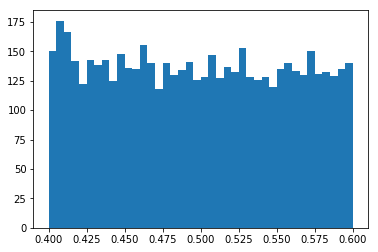

In [14]:
plt.hist(current_class_preds_proba,bins=40,range=(0.4,0.6))

### Retry after Scaling X_current_classif

In [19]:
ss = StandardScaler()
X_current_classif_s = ss.fit_transform(X_current_classif)

In [20]:
current_class_s_preds_proba = class_model.predict_proba(X_current_classif_s,verbose=1)

361423/361423 [==============================] - 36s 101us/step


In [21]:
current_class_s_preds_proba

array([[0.87482095],
       [0.3192853 ],
       [0.99108195],
       ...,
       [0.9613179 ],
       [0.99492466],
       [0.9953492 ]], dtype=float32)

In [22]:
class_model.predict(X_current_classif_s)

array([[0.87482095],
       [0.3192853 ],
       [0.99108195],
       ...,
       [0.9613179 ],
       [0.99492466],
       [0.9953492 ]], dtype=float32)

In [23]:
class_model.predict_classes(X_current_classif)

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]], dtype=int32)

(array([ 79378.,  20983.,  10846.,   7381.,   5533.,   4509.,   3877.,
          3352.,   3062.,   2757.,   2485.,   2379.,   2251.,   2106.,
          1973.,   2000.,   1917.,   1943.,   1816.,   1861.,   1843.,
          1870.,   1754.,   1937.,   2007.,   1987.,   2074.,   2104.,
          2275.,   2453.,   2624.,   2880.,   3082.,   3567.,   4111.,
          4877.,   6488.,   9344.,  17663., 124074.]),
 array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
        0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
        0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
        0.9  , 0.925, 0.95 , 0.975, 1.   ], dtype=float32),
 <a list of 40 Patch objects>)

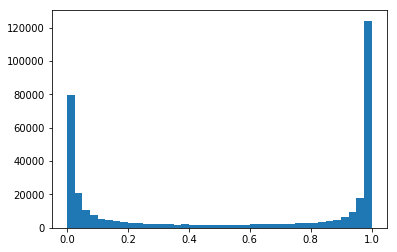

In [26]:
plt.hist(current_class_s_preds_proba,bins=40,range=(0,1))

(array([4565., 3747., 3339., 2971., 2649., 2477., 2251., 2096., 1965.,
        1894., 1799., 1717., 1667., 1535., 1612., 1534., 1533., 1550.,
        1432., 1488., 1479., 1497., 1480., 1399., 1549., 1606., 1631.,
        1567., 1696., 1672., 1807., 1927., 2018., 2156., 2324., 2457.,
        2735., 3037., 3425., 3983.]),
 array([0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22, 0.24, 0.26, 0.28, 0.3 ,
        0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44, 0.46, 0.48, 0.5 , 0.52,
        0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66, 0.68, 0.7 , 0.72, 0.74,
        0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88, 0.9 ], dtype=float32),
 <a list of 40 Patch objects>)

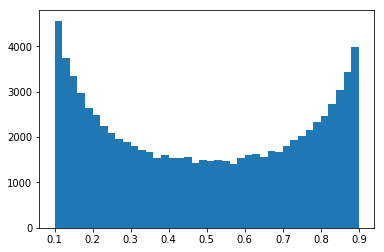

In [27]:
plt.hist(current_class_s_preds_proba,bins=40,range=(0.1,0.9))

In [33]:
#Probability of Default
1-current_class_s_preds_proba[:,0]

array([0.12517905, 0.6807147 , 0.00891805, ..., 0.0386821 , 0.00507534,
       0.00465077], dtype=float32)

# Recommendation Table

# Recommendation Summary Values

# Recommendation Descriptive Visuals